# 1-D Cutting Stock Problem

The problem involves cutting pieces of a specified length into smaller pieces of specified lengths, minimizing the amount of wasted material.

Let's consider having $m$ cables of length $l$. We want to cut $n$ smaller cables of various lengths $w_i$  | $i=1,2,...,n$.

Let $x_{i,j} \in \{0,1\}$ indicate whether the small cable $i$ was cut from the large cable $j$.

Finally, let $y_j \in \{0, 1\}$ be an indicator of whether cable $j$ was used or not.

The objective is to minimize cable waste.

Let's think about the waste in a particular piece $j$. This is given by:

$$ ly_j - \sum_{i=1}^{n}w_ix_{i,j} $$

Subject to:

The length of the long cable must be less than or equal to the sum of all cuts made:

$$ ly_j \leq \sum_{i=1}^{n}w_ix_{i,j} $$

The total loss would then be given by:

$$ \sum_{j=1}^{m} \left( ly_j - \sum_{i=1}^{n}w_ix_{i,j} \right) $$

with the same previous constraint.

The problem could be formulated as:

Minimize:

$$ \sum_{j=1}^{m} \left( ly_j - \sum_{i=1}^{n}w_ix_{i,j} \right) $$

Subject to:

$$ ly_j \leq \sum_{i=1}^{n}w_ix_{i,j} $$

## Brute force implementation approach

When tackling complex problems or optimization challenges, sometimes the most straightforward way to find a solution is through a brute force approach. This method involves systematically trying all possible solutions without any particular optimization or pruning strategies.

In [4]:
import itertools
import numpy as np

def brute_force_min_waste_j(l, w):
    """
    Brute force approach to find a solution for the Cutting Stock Problem for a single cable (j).

    Parameters:
    - l (int): Length of the cable.
    - w (numpy array): Array of lengths of smaller cables.

    Returns:
    - numpy array: Best solution for cutting the cable with minimum waste.
    """
    best_waste = float('inf')  # Initialize the best waste variable to positive infinity.
    best_solution = None  # Initialize the best solution variable.
    x = list(itertools.product([0, 1], repeat=len(w)))  # Generate all possible binary combinations for cutting.

    w = np.array(w)  # Convert the list of cable lengths to a numpy array.

    for xj in x:
        xj = np.array(xj)

        if np.all(xj == 0):
            pass  # Ignore the case where no cuts are made.
        else:
            waste = l - np.sum(xj * w)  # Calculate the waste for the current cut.
            is_best_waste = waste < best_waste  # Check if the current waste is the best so far.
            is_greater_than_zero = waste >= 0  # Ensure waste is not negative.

            if is_best_waste and is_greater_than_zero:
                best_waste = waste
                best_solution = xj * w  # Update the best solution if the waste is minimized.

    return best_solution

def brute_force_1dcsp(l, m, demand):
    """
    Brute force approach to solve the 1-Dimensional Cutting Stock Problem.

    Parameters:
    - l (int): Length of the initial cable.
    - m (int): Number of cables available.
    - demand (dict): Dictionary specifying the demand for each type of smaller cable.

    Returns:
    - numpy array: Best solution for cutting the cables with minimum waste.
    """
    best_waste = float('inf')  # Initialize the best waste variable to positive infinity.
    best_solution = []  # Initialize the best solution list.
    w = []  # Initialize the list to store the lengths of smaller cables.

    # Flatten the demand dictionary to get a list of cable lengths.
    for val in demand.values():
        for _ in range(val["qty"]):
            w.append(val["w"])

    w = np.array(w)  # Convert the list of cable lengths to a numpy array.
    missing_demand = w.copy()  # Initialize the missing demand array to the total demand.

    for j in range(m):
        single_best_solution = brute_force_min_waste_j(l, missing_demand)
        best_solution.append(single_best_solution)
        missing_demand = missing_demand - single_best_solution

        if np.all(missing_demand == 0):
            break  # Break if all demand is satisfied.

    if np.all(missing_demand == 0):
        pass  # The demand is met, and the solution can be visualized (not implemented).
    else:
        print(f"Stock is missing: failed to cut {missing_demand[missing_demand != 0]}")

    return np.array(best_solution)

# Example usage:
m = 5
l = 10

demand = {
  "A": {'w': 3, 'qty': 4, 'color': "blue"},
  "B": {'w': 2, 'qty': 3, 'color': "red"},
  "C": {'w': 5, 'qty': 4, 'color': "green"},
  "D": {'w': 1, 'qty': 2, 'color': "green"}
}

# Call the function with the example parameters.
solution = brute_force_1dcsp(l, m, demand)


In [7]:
solution

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0],
       [0, 0, 0, 3, 2, 2, 2, 0, 0, 0, 0, 0, 1],
       [3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

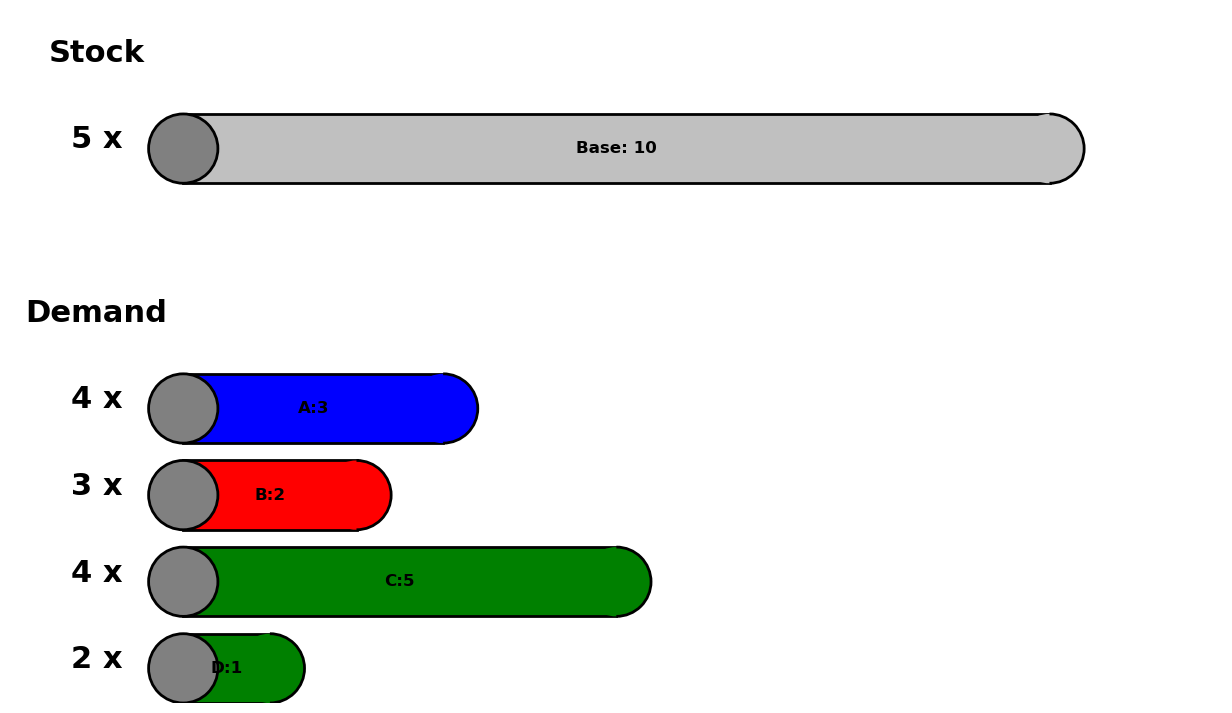

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def draw_cil(coord: tuple, size: float, ax, name, color):
    """
    Draw a rectangle and two semicircles at the corners to represent a cable segment.

    Parameters:
    - coord (tuple): Coordinates of the bottom-left corner of the rectangle.
    - size (float): Length of the cable segment.
    - ax (matplotlib axes): The Axes on which to draw.
    - name (str): Label for the cable segment.
    - color (str): Color of the cable segment.
    """
    rect = patches.Rectangle(coord, size, 0.8, linewidth=2, edgecolor='black', facecolor=color)
    ax.add_patch(rect)

    # Draw semicircles at the corners
    circle1 = patches.Circle((coord[0], coord[1] + 0.4), 0.4, linewidth=2, edgecolor='black', facecolor='gray')
    circle2 = patches.Circle((coord[0] + size, coord[1] + 0.4), 0.4, linewidth=2, edgecolor='None', facecolor=color)
    circle2e = patches.Arc((coord[0] + size, coord[1] + 0.4), .8, .8, theta1=270, theta2=90, linewidth=2,
                           edgecolor='black', facecolor='none')
    ax.add_patch(circle1)
    ax.add_patch(circle2)
    ax.add_patch(circle2e)

    center_x = coord[0] + size / 2
    center_y = coord[1] + 0.4
    ax.annotate(name, (center_x, center_y), color='black', weight='bold',
                fontsize=12, ha='center', va='center')


def find_key_by_w(demand, target_w):
    """
    Find the key in the demand dictionary based on the specified cable length.

    Parameters:
    - demand (dict): Dictionary specifying the demand for each type of smaller cable.
    - target_w (int): Cable length to search for.

    Returns:
    - str or None: The key in the demand dictionary if found, otherwise None.
    """
    for key, value in demand.items():
        if value['w'] == target_w:
            return key
    return None


def draw_solution(solution):
    """
    Draw the solution for the 1-Dimensional Cutting Stock Problem.

    Parameters:
    - solution (numpy array): Solution matrix obtained from the cutting stock algorithm.
    """
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(16, 9))

    for j in range(solution.shape[0]):
        sum_w = 0
        w = solution[j]
        for i, wi in enumerate(w[w != 0]):
            name = find_key_by_w(demand, wi)
            draw_cil((i + sum_w + 0.5, -j), wi, ax, f"{name}: {wi}", demand[name]['color'])
            sum_w += wi

    ax.set_xlim(0, l + solution.shape[1])
    ax.set_ylim(-solution.shape[0] - 1, 2)
    plt.show()


# Create a figure and axes
fig, ax = plt.subplots(figsize=(16, 9))
ax.annotate(f"Stock", (0, 1.5), color='black', weight='bold',
            fontsize=22, ha='center', va='center')
ax.annotate(f"{m} x", (0, 0.5), color='black', weight='bold',
            fontsize=22, ha='center', va='center')
draw_cil((1, 0), l, ax, f"Base: {l}", "silver")
ax.annotate(f"Demand", (0, -1.5), color='black', weight='bold',
            fontsize=22, ha='center', va='center')
for i, name in enumerate(demand.keys()):
    wi = demand[name]["w"]
    qty = demand[name]["qty"]
    color = demand[name]["color"]

    ax.annotate(f"{qty} x", (0, -2.5 - i), color='black', weight='bold',
                fontsize=22, ha='center', va='center')

    draw_cil((1, -3 - i), wi, ax, f"{name}:{wi}", color)
# Configure plot limits
ax.set_xlim(-1, l + 3)
ax.set_ylim(-6, 2)
# Show the plot
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')  # Hide the axes
plt.show()


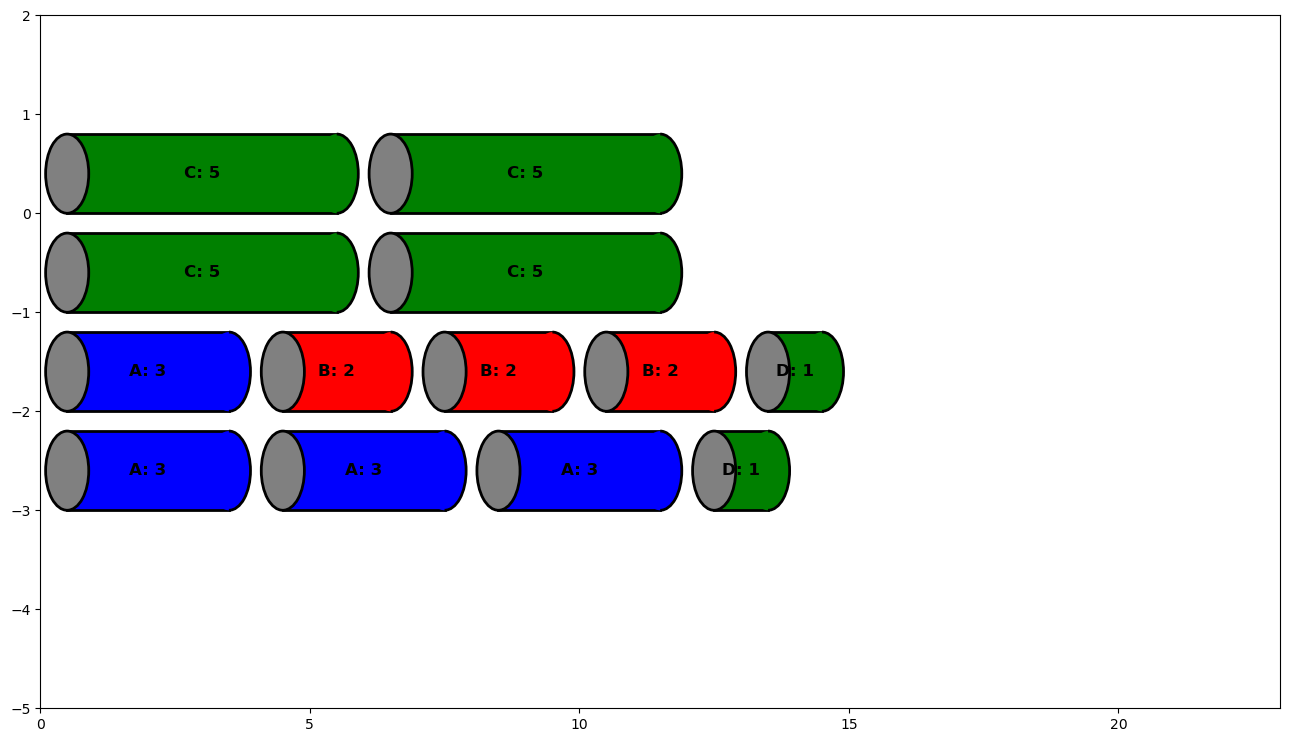

In [8]:
solution = brute_force_1dcsp(l, m, demand)
draw_solution(solution)